<a href="https://colab.research.google.com/github/wonyoung-ji/study/blob/master/kaggle/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 준비 및 모듈 임포트

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno  #결측치 시각화 함수

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거
import sys
import warnings
warnings.filterwarnings('ignore')

## CSV to DF

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

## 데이터프레임을 보는 다양한 방법

In [4]:
train.head()
# train.head(5)
# train.head(n=5)
# train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gavey, Mr. Lawrence",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe(): 연속된 값을 가진 열만 통계적인 면을 보여주나, include = 'all'로 세팅하면 모든 열을 출력

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

dtype: series형태이기 때문에 dtype()으로 출력시 error 발생.  
 즉, ()를 넣는다는 것은 각 행의 값들이 있어야 하는데, dtype은 이러한 형태가 아니므로 call할 수가 없다. 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info(): dtypes의 좀 더 발전된 개념. 데이터 타입뿐만 아니라, 빈칸이 아닌 개수까지 보여줌

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

columns: 데이터 프레임의 열의 제목들을 출력

In [11]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [12]:
train.shape

(891, 12)

# 2.파일 병합
- ntrain과 ntest의 shape를 확보 (병합한 것을 나중에 다시 갈라 놓기 위한 준비)
- y_train은 알려진 결과값이므로 따로 준비
- 테스트의 승객 아이디는 나중에 최종결과에 넣을 것이므로 따로 분할
- train과 test를 병합하여 data로 만듦.
(문자로 된 것을 숫자로 바꾸거나, 숫자를 interval 별로 그룹화하거나 등을 위해 합 해 놓음)


In [13]:
# 병합준비
ntrain = train.shape[0]
ntest = test.shape[0]

# y_train은 따로 모셔놓기
y_train = train['Survived'].values
passid = test['PassengerId']

# 병합 파일 만들기
data = pd.concat((train, test))

# 데이터행과 열의 크기는
print("data size is {}".format(data.shape))

data size is (1309, 12)


In [14]:
# ntrain의 생김새
ntrain

891

In [15]:
# ntest의 생김새
ntest

418

In [16]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [17]:
passid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [18]:
# train과 test를 합친 data
# test에서 'Survived'는 빈칸을 나타내는 NaN(Not a Number)를 보여줌
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
# format을 위한 간단한 연습
print("I like {}".format('eggs'))
print("I like {0} and {1}".format('eggs','spam'))
print("I like {1} and {0}".format('eggs','spam'))

I like eggs
I like eggs and spam
I like spam and eggs


# 3.파일 탐색

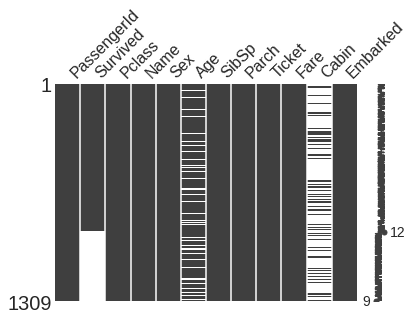

In [20]:
missingno.matrix(data,figsize=(6,4))

위 도표를 통해 빈 값을 직과적으로 확인 가능.  
아래 Survived가 비어 있는 것은, 테스트에 답으로 예측해야하는 부분이기 때문

In [21]:
data.isnull().sum() # 비어 있는 값 체크

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
data.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

data.isnull().any() - 각 컬럼별 빈값이 있는지 없는지 (=isna를 써도 같음)  
data.isnull().sum() - 전체 각 항목 중 빈칸이 몇 개나 있는지  
data.isnull().any().any() - 전체에 빈값이 있는지 없는지

In [23]:
data.Age.isnull().any()

True

In [24]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Feature 항목
  + __범주형 항목 (Categorical Features)__  
  둘 이상의 결과 요소가 있는 변수. 해당 기능의 각 값을 범주별로 분류 가능  
  ex) 성별(남성, 여성)  
  이산형 변수(discrete variable) = 범주형 변수(categorical variable) = 명목변수  
  데이터 셋에서 명목 항목 = Sex, Embark  
  Name, Ticket 등을 이로 변환해야 함
  + __Ordinal Variable__  
순위 변수. 범주형의 하나이지만, 값 사이의 상대 순서(=서열) 또는 정렬이 가능함  
데이터 셋에서 순위 항목: PClass  
Cabin을 이 범주로 변환해야 함  
  + __연속형 항목(Continuous Features)__  
서로 연속된 값을 가진 변수를 가진 항목. 연령이 대표적임  
Age, SipSp, Parch, Fare는 interval variable로 변환해야 함

* 열의 이름

          Variable          정의                Key

          survival          생존 여부            0 = No, 1 = Yes

          pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

          sex               성별    

          Age               나이  

          sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    

          parch             부모나 자식과 같이 탄 경우 수   

          ticket            표 번호    

          fare              요금

          cabin             선실 번호   

          embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton


# 4.데이터 탐구(Exploratory Data Analysis)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Co-relation 매트릭스 = 변수간 상관계수를 보여주는 seaborn 시각화 표  
표의 각 셀은 두 변수간 상관관계를 표현  
고급분석에 대한 진단으로 데이터를 요약하는 데 사용  
- 마스크 셋업: 0으로 행렬을 상관 행렬과 같은 모양으로 만든 후, 불리안 값을 넣어 이를 True만으로 만듦  
- triu = 우측 상단 삼각행렬
- annot = True는 각 셀에 숫자 표시.  False는 각셀에 미표시.  
- 이어서 이를 heatmap으로 런칭

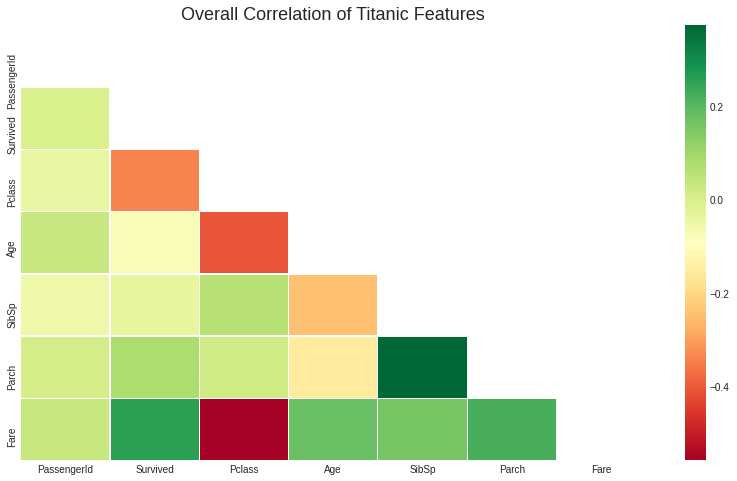

In [26]:
# Co-relation 매트릭스
corr = data.corr()

# 마스크 셋업
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(14,8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize = 18)

# Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn',linewidth=0.2, annot_kws={'size':20})
plt.show()

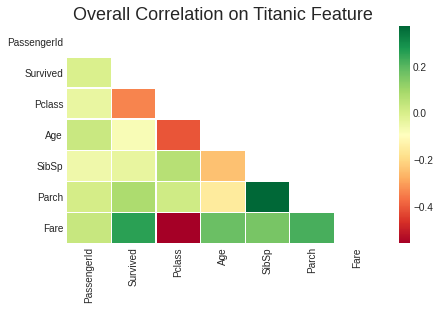

In [27]:
# Co-relation 매트릭스
corr = data.corr()
# 변수 corr에 data 데이터셋의 상관계수를 만드는 함수 .corr()을 붙여 할당

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
# 여기에 0으로 된 매트릭스를 마스크에 붙임. 모양을 만드는 것
# corr에서 관계 숫자는 만들어졌고, mask는 같은 모양의 매트릭스를 만들었는데, 모두 0이 아니므로 False로 뜸
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(7,4))
plt.title('Overall Correlation on Titanic Feature',fontsize = 18)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
plt.show()

- "Survived" 분석  
0 = Not survived  
1 = Survived  
Categorical Variable(죽던지 살던지 둘 중 하나)  
countplot을 그려본다  
사이즈는 가로 10, 세로 2  
생존여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령  
pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트 플롯을 그림

0    549
1    342
Name: Survived, dtype: int64


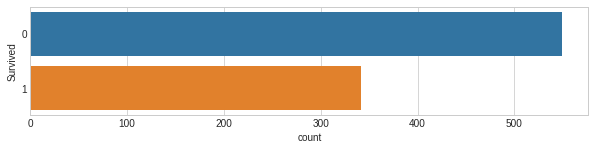

In [28]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

- 사망자 훨씬 많음  
전체 사망자 비율 확인 필요  
파이그래프, 카운트 플롯을 서브 플롯으로 출력  
행은 하나, 열은 2개의 서브 플롯  
사이즈는 가로 15, 세로 6인치  
'Survived'의 값을 카운트해서 파이플롯 생성  
- explode: 폭발하는 것이므로 1이면 튀어 나감, 0을 주면 분리만 되고 돌출은 되지 않음(0=미분리, 1=분리 의미)  
- autopercent: 1.1이 표현하는 부분은 소수점 한 자리까지 표시한다는 의미. 점 이하가 4이면 둘 다 소수점 4자리수까지 출력  
- ax[0]은 첫번째 칸
- set_title 메소드는 서브플롯의 제목 표출



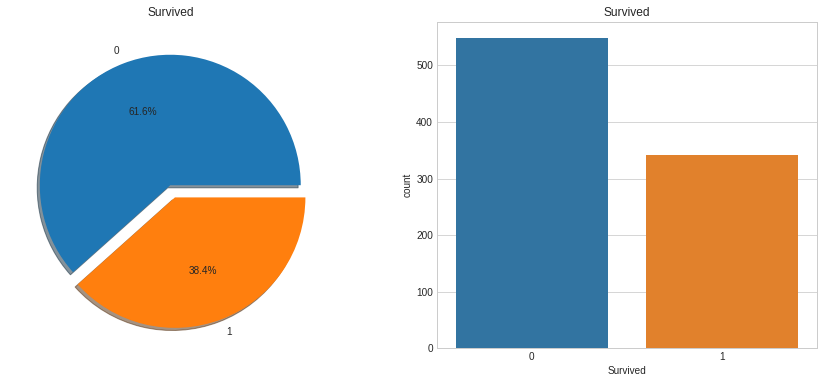

In [29]:
f,ax = plt.subplots(1,2,figsize=(15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

위의 절차를 아래와 같이 함수로 형성

In [30]:
def piecount(col):
  f, ax = plt.subplots(1,2,figsize=(15,6))
  train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0],shadow=True)
  ax[0].set_title(col)
  ax[0].set_ylabel('')
  sns.countplot(col,data=train, ax=ax[1])
  ax[1].set_title(col)
  plt.show()

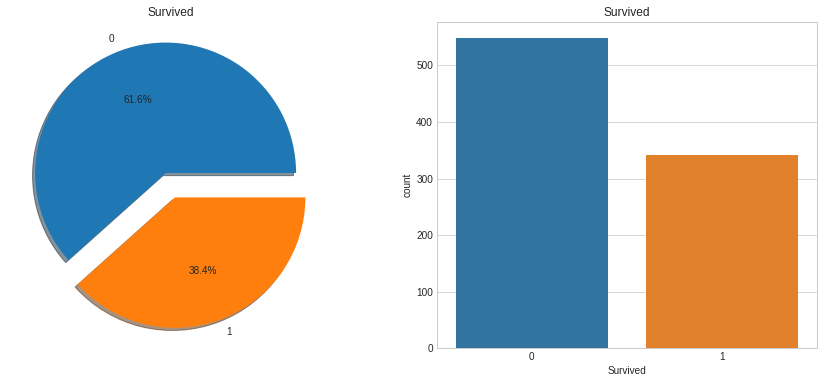

In [31]:
piecount('Survived')

## Pclass 분석
- Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature
- Key: 1 = 1st, 2 = 2nd, 3 = 3rd
- 각 클래스 당 생존자 수

In [32]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [33]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


1등급 - 객실의 사람들은 생존자가 더 많음  
2등급 - 생존자에 비해 사망자가 조금 더 많음  
3등급 - 사망자가 3배 이상 많음

In [34]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


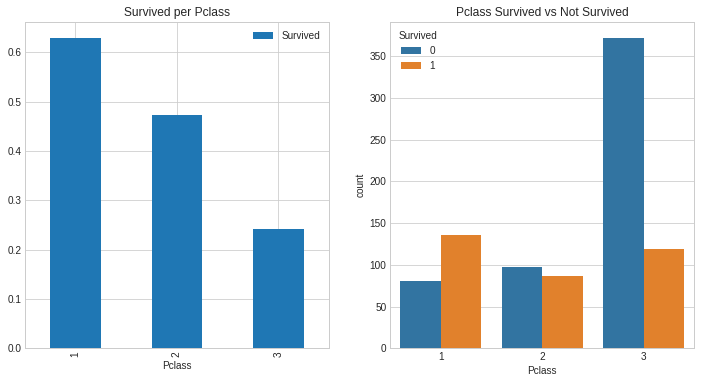

In [35]:
f, ax = plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass',data=train, hue='Survived',ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

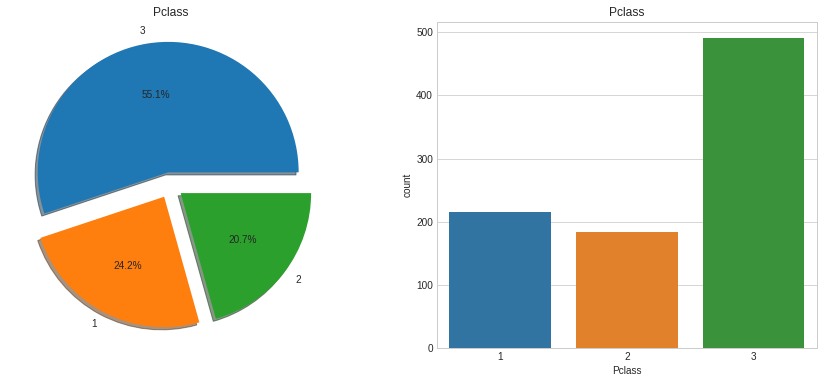

In [36]:
piecount('Pclass')

%는 3등칸이 반이나 넘으나, 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있음  
각 클래스 당 생존률은?

## Name 분석
- 이름은 다를 가능성이 매우 큼
- 분류 실시

In [38]:
data.Name.value_counts()

Connolly, Miss. Kate                                    2
Kelly, Mr. James                                        2
Spedden, Mr. Frederic Oakley                            1
Larsson, Mr. August Viktor                              1
Humblen, Mr. Adolf Mathias Nicolai Olsen                1
                                                       ..
Eustis, Miss. Elizabeth Mussey                          1
Graham, Mrs. William Thompson (Edith Junkins)           1
Douglas, Mrs. Frederick Charles (Mary Helene Baxter)    1
Delalic, Mr. Redjo                                      1
Moubarek, Master. Gerios                                1
Name: Name, Length: 1307, dtype: int64

- 호칭(Mr, Ms 등)을 보아야 함
- "Initial"이란 열을 새로 생성하여, Name에서 추출한 Regular Expression을 추가
- str.extract('([A-Za-z]+).'): str에서 대문자,소문자 중에 .명령을 통해, .으로 끝나는 부분 추출
- ('^[A-Za-z]+)'): 처음에 나오는 문자 덩어리. +을 빼면 첫 스펠링 한 캐릭터만 추출

In [39]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

Miss, Mr는 많이 등장  
그 외 익숙하지 않은 몇 개도 존재

In [43]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Jonkheer      1
Sir           1
Don           1
Dona          1
Mme           1
Countess      1
Lady          1
Name: Initial, dtype: int64

성별로 구분

In [46]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


생존률 함수 생성하여 생존률 확인  

In [48]:
def survpct(col):
  return temp.groupby(col)['Survived'].mean()

In [49]:
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

생존숫자로 확인


test에 있는 Dona의 나이를 보고, 어디에 넣을지 결정  
Ms.는 현대의 Miss + Mrs.를 합친 게 아닌, 당시 귀족미망인 의미  
Mile, Mme 등도 마드모아젤과 마담의 줄인말. 즉, 귀족여성으로 분류

In [50]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [53]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial에서 Mr. 등의 호칭 뽑아내고, 성을 뽑아냄  
머신에 적용하기 위해 알파벳을 숫자로 변환  
Dona 처리

In [54]:
temp.loc[temp['Initial']=='Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


나이로 추측하여 Mrs.로 분류  
결측치가 하나일 경우, 가장 적절한 추축을 사용하여 넣는 것도 좋은 방법 

In [55]:
temp.loc[temp['Initial']=='Donca','Initial'] = 'Mrs'

In [58]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


Last name은 전부 숫자로 변환

In [62]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [63]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [64]:
temp.loc[temp['NumName']==27]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,O,27
47,48,1.0,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss,O,27
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs,O,27
364,365,0.0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,Mr,O,27
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,Mr,O,27
502,503,0.0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,Miss,O,27
552,553,0.0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,Mr,O,27
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr,O,27
653,654,1.0,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,Miss,O,27
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Ms,O,27


Last Name에 같은 번호가 배정되어 있음  
끝에 [0]은 라벨만 보고 번호를 붙이는 것으로, 정말 unique한 것이란 것은 안 본다는 것  


## Sex 분석

In [65]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [69]:
def bag(col, target, title, title1):
  f, ax=plt.subplots(1,2, figsize=(12,5))
  train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
  ax[0].set_title(title)
  sns.countplot(col,hue=target, data=train, ax=ax[1])
  ax[1].set_title(title1)
  plt.show()

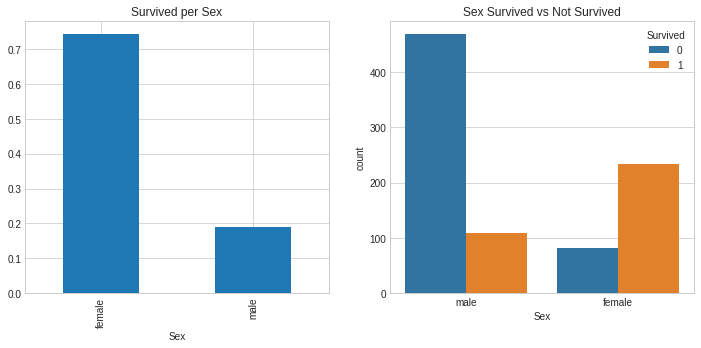

In [70]:
bag('Sex','Survived', 'Survived per Sex', 'Sex Survived vs Not Survived')

배에 탑승한 남자 > 탑승한 여자.  
생존 여성의 수 = 생존 남성의 수 X 2.(선박 여성의 생존율은 75%인 반면, 남성의 생존율은 18-19%)  
남성/여성을 1,2로 나누면 될 것 같지만, 조금 더 세분화 하면 좋을 것으로 보임  
(예- 아기들은 아기인지, 남자인지, 여자인지, 구명보트를 태울 때 안 물어본 것이기 때문)  
생존 Pclass별 성별 확인

In [72]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap='summer_r')

'Sex'항목을 다음과 같이 나누는 것도 좋은 생각

In [73]:
# temp['Gender'] = 0
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==1),'Gender' ] = 1
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==2),'Gender' ] = 2
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==3),'Gender' ] = 2
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==1),'Gender' ] = 3
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==2),'Gender' ] = 4
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==3),'Gender' ] = 5
# temp.loc[temp['Age']<1.0, 'Gender'] = 6

## Age분석